  ### Importando as dependências 

In [1]:
from quantumnet.components import Network, Host
from quantumnet.objects import Qubit, Logger

### Instanciando a rede, setando a topologia e ativando o log 

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


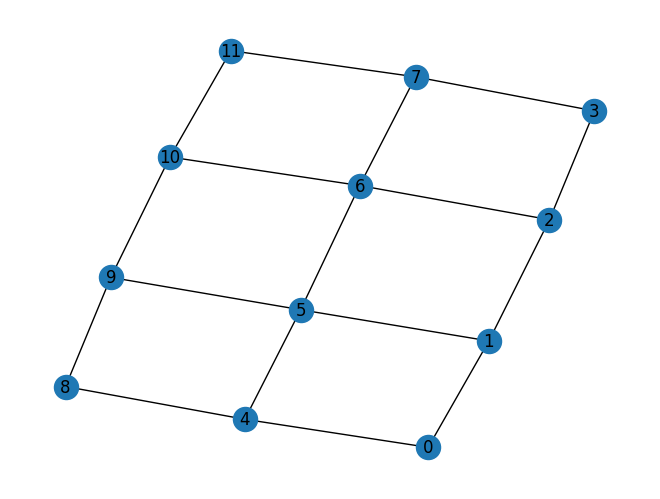

In [2]:
rede = Network()
rede.set_ready_topology("Grade", 3,4)
rede.draw()
Logger.activate(Logger)

#### Pegando alice e bob como os nós 1, 2 respectivamente

In [3]:
alice = rede.get_host(1)
bob = rede.get_host(2)

### Função de verificação do canal, para sabermos o estado do canal

In [4]:
rede.get_channel_info(1,2)

{'type': 'XZ',
 'prob_erro_X': 0.27416767582730484,
 'prob_erro_Y': 0.0,
 'prob_erro_Z': 0.3624711027607259,
 'prob_erro_XZ': 0.22121183153602464}

### Função para estimar os rounds dado a fidelidade

In [5]:
# rede.linklayer.round_estimates(1,2,0.9999999767694274)

### Função de verificação de todos os canais da rede, para sabermos o estado de todos os canais 

In [6]:
rede.channels_informations()

Canal entre 0 e 4:
  Tipo: X
  Probabilidade de erro X: 0.1737407808997531
  Probabilidade de erro Y: 0.0
  Probabilidade de erro Z: 0.0
  Probabilidade de erro XZ: 0.0
----------------------------------------
Canal entre 0 e 1:
  Tipo: Y
  Probabilidade de erro X: 0.0
  Probabilidade de erro Y: 0.45818185818379653
  Probabilidade de erro Z: 0.0
  Probabilidade de erro XZ: 0.0
----------------------------------------
Canal entre 1 e 5:
  Tipo: X
  Probabilidade de erro X: 0.21439121091617133
  Probabilidade de erro Y: 0.0
  Probabilidade de erro Z: 0.0
  Probabilidade de erro XZ: 0.0
----------------------------------------
Canal entre 1 e 2:
  Tipo: XZ
  Probabilidade de erro X: 0.27416767582730484
  Probabilidade de erro Y: 0.0
  Probabilidade de erro Z: 0.3624711027607259
  Probabilidade de erro XZ: 0.22121183153602464
----------------------------------------
Canal entre 2 e 6:
  Tipo: Z
  Probabilidade de erro X: 0.0
  Probabilidade de erro Y: 0.0
  Probabilidade de erro Z: 0.11388

In [7]:
rede.get_channel_info(1,2)

{'type': 'XZ',
 'prob_erro_X': 0.27416767582730484,
 'prob_erro_Y': 0.0,
 'prob_erro_Z': 0.3624711027607259,
 'prob_erro_XZ': 0.22121183153602464}

In [8]:
rede.linklayer.purification_scheduling(1,2,'symmetric',rounds= 4,Policy= 1)

2024-12-28 00:48:56,148: Iniciando purificação simétrica entre 1 e 2 para 4 rounds.
2024-12-28 00:48:56,149: Não há EPRs suficientes para purificação. Necessário: 16, Disponível: 0. Criando 16 EPRs adicionais.
2024-12-28 00:48:56,149: Par EPR <quantumnet.objects.epr.Epr object at 0x000001B142998860> adicionado ao canal (1, 2).
2024-12-28 00:48:56,149: Par EPR <quantumnet.objects.epr.Epr object at 0x000001B142E787D0> adicionado ao canal (1, 2).
2024-12-28 00:48:56,150: Par EPR <quantumnet.objects.epr.Epr object at 0x000001B143FCB6B0> adicionado ao canal (1, 2).
2024-12-28 00:48:56,150: Par EPR <quantumnet.objects.epr.Epr object at 0x000001B143FA7AD0> adicionado ao canal (1, 2).
2024-12-28 00:48:56,150: Par EPR <quantumnet.objects.epr.Epr object at 0x000001B12BCC95E0> adicionado ao canal (1, 2).
2024-12-28 00:48:56,150: Par EPR <quantumnet.objects.epr.Epr object at 0x000001B142F437D0> adicionado ao canal (1, 2).
2024-12-28 00:48:56,150: Par EPR <quantumnet.objects.epr.Epr object at 0x000

False

### Função de agendamento de purificação, nesta função é verificado se o canal está pronto para purificação, se sim, é agendado a purificação, além disso podemos escolher entre a purifição simétrica ou pumping, e quantidade de rounds desejados 

In [9]:
# rede.linklayer.purification_scheduling(1,2,'simetric',3)

### Função de agendamento de verificação para verificar quantos eprs são necessários para purificar o canal

In [10]:
# rede.linklayer.scheduling_verify(1,2,3)

In [11]:
rede.get_eprs_from_edge(1,2)

In [12]:
# Obter a lista de EPRs entre os nós 1 e 2
eprs = rede.get_eprs_from_edge(1, 2)

# Selecionar o EPR que você deseja medir
epr = eprs[0]

# Medir a fidelidade do EPR
fidelidade = epr.get_current_fidelity()

# Exibir a fidelidade
print(f"A fidelidade do EPR é: {fidelidade}")


A fidelidade do EPR é: 0.5671142131979696


In [13]:
# # Inicializa a lista para salvar as métricas de cada simulação
# simulation_results = []

# # Loop para rodar a simulação 100 vezes
# for attempt in range(100):
#     # Inicializa a rede e os hosts
#     rede = Network()
#     rede.set_ready_topology("Grade", 3, 4)
#     rede.draw()
#     Logger.activate(Logger)
#     alice = rede.get_host(1)
#     bob = rede.get_host(2)
    
#     # Executa o agendamento de purificação e armazena o sucesso/falha e número de rounds
#     success = rede.linklayer.purification_scheduling(1, 2, 'symmetric', rounds=3, Policy=1)
    
#     # Armazena os resultados da simulação
#     simulation_results.append({
#         "simulation": attempt + 1,
#         "success": success,
#         "rounds": 3  # número de rounds configurado
#     })

# # Exibe os resultados de todas as simulações
# for result in simulation_results:
#     print(f"Simulação {result['simulation']}: {'Sucesso' if result['success'] else 'Falha'}, Rounds: {result['rounds']}")
